### Titanic Dataset: Data Preprocessing and Pipelining

In [11]:
import pandas as pd

In [12]:
#Importing data
train_data = pd.read_csv('TitanicDataset/train.csv')
test_data = pd.read_csv('TitanicDataset/test.csv')

In [13]:
train_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [14]:
X = train_data.drop(columns=['PassengerId','Name','Ticket','Cabin', 'Survived'])

In [15]:
y = train_data[['Survived']]

In [16]:
X.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,3,male,22.0,1,0,7.2500,S
1,1,female,38.0,1,0,71.2833,C
2,3,female,26.0,0,0,7.9250,S
3,1,female,35.0,1,0,53.1000,S
4,3,male,35.0,0,0,8.0500,S


In [17]:
y.head()

,Survived
0,0
1,1
2,1
3,1
4,0


#### Imputation (Fill in the missing values)

In [18]:
X.isna().sum()

Pclass        0
Sex           0
Age         177
SibSp         0
Parch         0
Fare          0
Embarked      2
dtype: int64

In [19]:
import matplotlib.pyplot as plt
import seaborn as sns

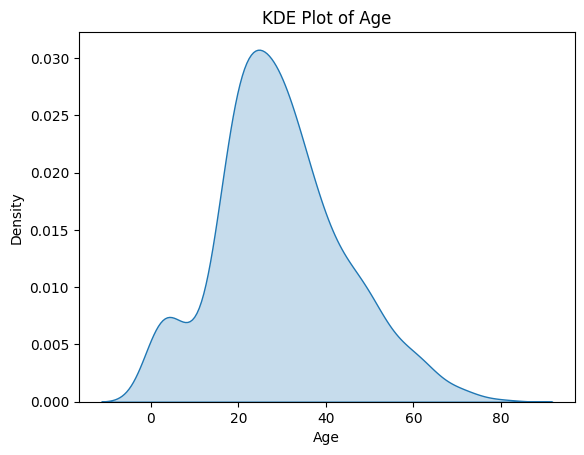

In [20]:
sns.kdeplot(X['Age'], fill=True)
plt.title("KDE Plot of Age")
plt.show()

In [21]:
#SImpleImputer and IterativeImputer
from sklearn.impute import SimpleImputer
import numpy as np

In [22]:
X['Age'].unique()

array([22.  , 38.  , 26.  , 35.  ,   nan, 54.  ,  2.  , 27.  , 14.  ,
        4.  , 58.  , 20.  , 39.  , 55.  , 31.  , 34.  , 15.  , 28.  ,
        8.  , 19.  , 40.  , 66.  , 42.  , 21.  , 18.  ,  3.  ,  7.  ,
       49.  , 29.  , 65.  , 28.5 ,  5.  , 11.  , 45.  , 17.  , 32.  ,
       16.  , 25.  ,  0.83, 30.  , 33.  , 23.  , 24.  , 46.  , 59.  ,
       71.  , 37.  , 47.  , 14.5 , 70.5 , 32.5 , 12.  ,  9.  , 36.5 ,
       51.  , 55.5 , 40.5 , 44.  ,  1.  , 61.  , 56.  , 50.  , 36.  ,
       45.5 , 20.5 , 62.  , 41.  , 52.  , 63.  , 23.5 ,  0.92, 43.  ,
       60.  , 10.  , 64.  , 13.  , 48.  ,  0.75, 53.  , 57.  , 80.  ,
       70.  , 24.5 ,  6.  ,  0.67, 30.5 ,  0.42, 34.5 , 74.  ])

In [23]:
impute_age = SimpleImputer(missing_values=np.nan, strategy='mean')

In [24]:
impute_age.fit(X[['Age']])

SimpleImputer()

In [25]:
X['Age'] = impute_age.transform(X[['Age']])

In [26]:
#X['Age'].unique()

In [27]:
X['Embarked'].unique()

array(['S', 'C', 'Q', nan], dtype=object)

In [28]:
imp_embarked = SimpleImputer(missing_values=np.nan, strategy='most_frequent')

In [29]:
imp_embarked.fit(X[['Embarked']])

SimpleImputer(strategy='most_frequent')

In [30]:
X[['Embarked']] = imp_embarked.transform(X[['Embarked']])

In [31]:
X['Embarked'].isna().sum()

0

In [32]:
X.isna().sum()

Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    0
dtype: int64

#### Standardization and Scaling

In [33]:
X.dtypes

Pclass        int64
Sex          object
Age         float64
SibSp         int64
Parch         int64
Fare        float64
Embarked     object
dtype: object

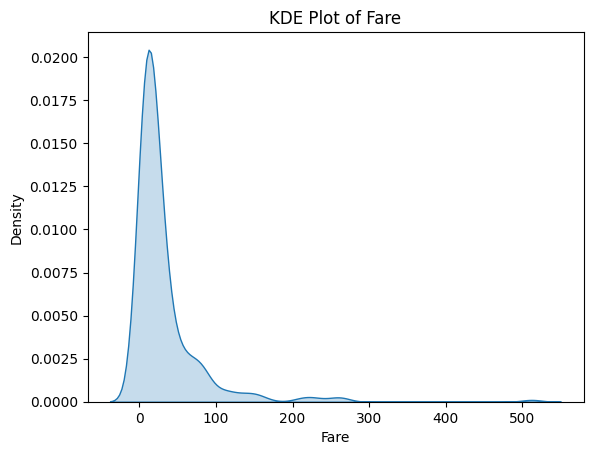

In [34]:
sns.kdeplot(X['Fare'], fill=True)
plt.title("KDE Plot of Fare")
plt.show()

In [35]:
# import scipy.stats as stats
# stats.probplot(X['Age'], dist="norm", plot=plt)

##### Scaling Age with standard scaler

In [36]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler

In [37]:
standardScaler = StandardScaler()

In [38]:
X['Age']=standardScaler.fit_transform(X[['Age']])

In [39]:
X['Age']

0     -0.592481
1      0.638789
2     -0.284663
3      0.407926
4      0.407926
         ...   
886   -0.207709
887   -0.823344
888    0.000000
889   -0.284663
890    0.177063
Name: Age, Length: 891, dtype: float64

In [40]:
minmaxScaler = MinMaxScaler()

In [41]:
X['Fare'] = minmaxScaler.fit_transform(X[['Fare']])

In [42]:
X['Fare'].min(), X['Fare'].max()

(0.0, 1.0)

#### Encoding the categorical values: Ordinal, Label and One hot encoder

In [43]:
from sklearn.preprocessing import OrdinalEncoder, OneHotEncoder

In [44]:
ordinal = OrdinalEncoder()

In [45]:
X['Sex'] = ordinal.fit_transform(X[['Sex']])

In [46]:
X['Sex']

0      1.0
1      0.0
2      0.0
3      0.0
4      1.0
      ... 
886    1.0
887    0.0
888    0.0
889    1.0
890    1.0
Name: Sex, Length: 891, dtype: float64

In [47]:
onehot = OneHotEncoder(sparse=False)

In [48]:
emabarked = onehot.fit_transform(X[['Embarked']])

/Users/shafisourov/anaconda3/envs/Computer-programming/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


In [49]:
onehot.inverse_transform(emabarked)

array([['S'],
       ['C'],
       ['S'],
       ['S'],
       ['S'],
       ['Q'],
       ['S'],
       ['S'],
       ['S'],
       ['C'],
       ['S'],
       ['S'],
       ['S'],
       ['S'],
       ['S'],
       ['S'],
       ['Q'],
       ['S'],
       ['S'],
       ['C'],
       ['S'],
       ['S'],
       ['Q'],
       ['S'],
       ['S'],
       ['S'],
       ['C'],
       ['S'],
       ['Q'],
       ['S'],
       ['C'],
       ['C'],
       ['Q'],
       ['S'],
       ['C'],
       ['S'],
       ['C'],
       ['S'],
       ['S'],
       ['C'],
       ['S'],
       ['S'],
       ['C'],
       ['C'],
       ['Q'],
       ['S'],
       ['Q'],
       ['Q'],
       ['C'],
       ['S'],
       ['S'],
       ['S'],
       ['C'],
       ['S'],
       ['C'],
       ['S'],
       ['S'],
       ['C'],
       ['S'],
       ['S'],
       ['C'],
       ['S'],
       ['S'],
       ['S'],
       ['C'],
       ['C'],
       ['S'],
       ['S'],
       ['S'],
       ['S'],
       ['S'],
      

In [50]:
emabarked

array([[0., 0., 1.],
       [1., 0., 0.],
       [0., 0., 1.],
       ...,
       [0., 0., 1.],
       [1., 0., 0.],
       [0., 1., 0.]])

In [51]:
columns_embarked = onehot.get_feature_names_out()

In [52]:
embarked_df = pd.DataFrame(emabarked, columns=columns_embarked)

In [53]:
embarked_df

,Embarked_C,Embarked_Q,Embarked_S
0,0.0,0.0,1.0
1,1.0,0.0,0.0
2,0.0,0.0,1.0
3,0.0,0.0,1.0
4,0.0,0.0,1.0
...,...,...,...
886,0.0,0.0,1.0
887,0.0,0.0,1.0
888,0.0,0.0,1.0
889,1.0,0.0,0.0


In [54]:
X = pd.concat([X, embarked_df],axis=1).drop(columns=['Embarked'])

In [55]:
X.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked_C,Embarked_Q,Embarked_S
0,3,1.0,-0.592481,1,0,0.014151,0.0,0.0,1.0
1,1,0.0,0.638789,1,0,0.139136,1.0,0.0,0.0
2,3,0.0,-0.284663,0,0,0.015469,0.0,0.0,1.0
3,1,0.0,0.407926,1,0,0.103644,0.0,0.0,1.0
4,3,1.0,0.407926,0,0,0.015713,0.0,0.0,1.0


#### Combining and Pipelining

In [56]:
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

In [57]:
X_pipeline = train_data.drop(columns=['PassengerId','Name','Ticket','Cabin', 'Survived'])

In [58]:
age = Pipeline([('impute_age', SimpleImputer(strategy='mean')),('scale_age',StandardScaler())])

In [59]:
fare = Pipeline([('impute_fare', SimpleImputer(strategy='mean')),('scale_fare',MinMaxScaler())])

In [60]:
embarked_t = Pipeline([('impute_embarked', SimpleImputer(strategy='most_frequent')),('encode_embarked',OneHotEncoder())])

In [61]:
sex = Pipeline([('encoded_sex', OrdinalEncoder())])

In [62]:
preprocessor = ColumnTransformer(
    transformers=[
        ('age', age, ['Age']),
        ('fare', fare, ['Fare']),
        ('embarked', embarked_t, ['Embarked']),
        ('sex', sex, ['Sex'])
    ],
    remainder='passthrough'
)

In [63]:
from sklearn.linear_model import LogisticRegression

In [64]:
Y = train_data[['Survived']]

In [65]:
Y

,Survived
0,0
1,1
2,1
3,1
4,0
...,...
886,0
887,1
888,0
889,1


In [66]:
pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('classifier', LogisticRegression())
])

In [67]:
pipeline.fit(X_pipeline, Y)

/Users/shafisourov/anaconda3/envs/Computer-programming/lib/python3.11/site-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Pipeline(steps=[('preprocessor',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('age',
                                                  Pipeline(steps=[('impute_age',
                                                                   SimpleImputer()),
                                                                  ('scale_age',
                                                                   StandardScaler())]),
                                                  ['Age']),
                                                 ('fare',
                                                  Pipeline(steps=[('impute_fare',
                                                                   SimpleImputer()),
                                                                  ('scale_fare',
                                                                   MinMaxScaler())]),
                                                  ['Fare']),
                                                 ('embarked',
                                                  Pipeline(steps=[('impute_embarked',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('encode_embarked',
                                                                   OneHotEncoder())]),
                                                  ['Embarked']),
                                                 ('sex',
                                                  Pipeline(steps=[('encoded_sex',
                                                                   OrdinalEncoder())]),
                                                  ['Sex'])])),
                ('classifier', LogisticRegression())])

In [68]:
X_test = test_data.drop(columns=['PassengerId','Name','Ticket','Cabin'])
y_test = pd.read_csv('gender_submission.csv')['Survived'].values

FileNotFoundError: [Errno 2] No such file or directory: 'gender_submission.csv'

In [ ]:
test_data


,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
413,1305,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
414,1306,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
415,1307,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,1308,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S


In [ ]:
X_test

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,3,male,34.5,0,0,7.8292,Q
1,3,female,47.0,1,0,7.0000,S
2,2,male,62.0,0,0,9.6875,Q
3,3,male,27.0,0,0,8.6625,S
4,3,female,22.0,1,1,12.2875,S
...,...,...,...,...,...,...,...
413,3,male,NaN,0,0,8.0500,S
414,1,female,39.0,0,0,108.9000,C
415,3,male,38.5,0,0,7.2500,S
416,3,male,NaN,0,0,8.0500,S


In [ ]:
y_pred = pipeline.predict(X_test)

In [ ]:
y_pred

array([0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0,
       1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1,
       1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1,
       1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1,
       0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0,

In [ ]:
from sklearn.metrics import confusion_matrix

In [70]:
# X_transformed = pipeline.fit_transform(X_pipeline)

ValueError: This LogisticRegression estimator requires y to be passed, but the target y is None.

In [ ]:
y_test

array([0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0,
       1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1,
       1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1,
       1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1,
       0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0,

In [ ]:
# pipeline.inverse_transform(X_transformed[0])

In [ ]:
# X_transformed[0]

In [ ]:
# X.head(1)

#### Calculate the accuracy 

correct_predictions/ total_samples

In [ ]:
correct_predictions = 0
total_samples = len(y_test)

for true_label, y_label in zip(y_test, y_pred):
    if true_label == y_label:
        correct_predictions += 1
    
accuracy = correct_predictions / total_samples
    

In [ ]:
pipeline.score(X_test,y_test)

0.9401913875598086

In [ ]:
print("Accuracy: ",accuracy)

Accuracy:  0.9401913875598086


In [ ]:
#zip(y_test, y_pred)

In [ ]:
#confusion_matrix(y_test, y_pred)

#### Confusion matrix
[[TN,FP], [FN,TP]]

In [ ]:
TP = 0
TN = 0
FP = 0
FN = 0

In [ ]:
for true_label, y_label in zip(y_test, y_pred):
    if true_label == 1 and y_label == 1:
        TP += 1
    elif true_label == 0 and y_label == 0:
        TN += 1
    elif true_label == 0 and y_label == 1:
        FP += 1
    elif true_label == 1 and y_label == 0:
        FN += 1

In [ ]:
TP, TN, FP, FN

(141, 252, 14, 11)

In [ ]:
confusion_matrix = [[
    TN, FP
],[
    FN, TP
]]

In [ ]:
confusion_matrix

[[252, 14], [11, 141]]

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

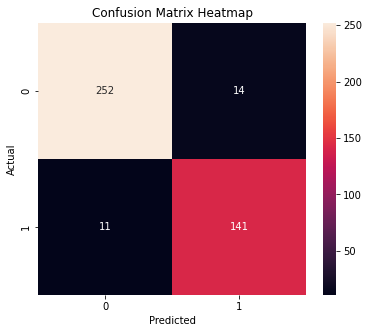

In [ ]:
plt.figure(figsize=(6,5))
sns.heatmap(confusion_matrix, annot=True, fmt="d")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix Heatmap")
plt.show()

In [69]:
import pickle
import joblib


In [73]:
pickle.dump(pipeline, open('model.pkl','wb+'))

In [75]:
model = pickle.load(open('model.pkl','rb+'))

In [80]:
joblib_model = joblib.load('model.pkl')

In [83]:
X_test

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,3,male,34.5,0,0,7.8292,Q
1,3,female,47.0,1,0,7.0000,S
2,2,male,62.0,0,0,9.6875,Q
3,3,male,27.0,0,0,8.6625,S
4,3,female,22.0,1,1,12.2875,S
...,...,...,...,...,...,...,...
413,3,male,NaN,0,0,8.0500,S
414,1,female,39.0,0,0,108.9000,C
415,3,male,38.5,0,0,7.2500,S
416,3,male,NaN,0,0,8.0500,S


In [82]:
model.predict(X_test)

array([0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0,
       1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1,
       1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1,
       1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1,
       0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0,